In [2]:
import pandas as pd

# import data for restaurants and reviews
restaurants = pd.read_csv('processed_data/restaurants_price_score.csv')
reviews = pd.read_csv('processed_data/reviews_restaurants.csv')

# filter the data to reviews of restaurants with a price score
reviews = reviews[reviews['business_id'].isin(restaurants['business_id'].tolist())]

In [3]:
# transfer information from price score to reviews
price_information = dict(zip(restaurants['business_id'].tolist(), restaurants['price_score'].tolist()))
reviews['price_score'] = reviews['business_id'].apply(lambda x: price_information.get(x))

reviews

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,price_range,state,price_score
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0.0,0.0,0.0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,2,PA,2.063325
1,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0.0,0.0,0.0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,1,AZ,1.959730
2,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1.0,0.0,1.0,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,2,PA,2.165627
3,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1.0,0.0,1.0,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,2,LA,1.263071
4,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1.0,1.0,2.0,1.0,I am a long term frequent customer of this est...,2015-09-23 23:10:31,2,PA,2.469745
...,...,...,...,...,...,...,...,...,...,...,...,...
4548081,cACxcUY_AIsQKkpDRXuqnw,MCzlzlOw7IGbRAKVjJBPtg,fcGexL5VH5G2Xw0tRj9uOQ,3.0,1.0,1.0,0.0,This is a good pizza option - they deliver thr...,2018-03-13 13:54:48,2,PA,1.907695
4548082,7NgXAuTFiJHYbuepOPwU0w,x1QLCwZGFAjxRRw4EHc3-g,1_BVWDzi5cVqWxNe9bOMMQ,5.0,1.0,0.0,1.0,Don't misinterpret my 5-star review....I don't...,2016-04-30 01:02:34,1,MO,0.779100
4548083,YVX1Wsa4LYxjvFwuHBb_gA,RKPkxOYQlM0BjhM-H6_vAw,X4mouE_cMiwbfyCPZ_K-FA,4.0,3.0,0.0,2.0,"Good, maybe very good. I went for lunch, so t...",2015-01-23 23:52:03,2,NJ,2.093681
4548084,i-I4ZOhoX70Nw5H0FwrQUA,YwAMC-jvZ1fvEUum6QkEkw,Rr9kKArrMhSLVE9a53q-aA,5.0,1.0,0.0,0.0,For when I'm feeling like ignoring my calorie-...,2022-01-19 18:59:27,2,IN,2.042872


In [29]:
from yelp_functions import gini_index_sample

# create a set with all the states and a dictionary to store the values of G
states = set(reviews['state'].tolist())
G_values = dict()

# fill the dictionary with the G values
for state in states:
    if state in ['AB', 'CO', 'NC', 'XMS']:
        pass
    else:
        state_reviews = reviews.loc[reviews['state'] == state]
        state_reviews = state_reviews.groupby('user_id').mean()
        G_values[state] = [gini_index_sample(state_reviews['price_range'].tolist()),
                           gini_index_sample(state_reviews['price_score'].tolist())]

# create a dataframe for the data using G values
inequality_data = pd.DataFrame.from_dict(G_values, orient='index').reset_index()
inequality_data.rename(columns = {'index': 'state', 0: 'G_range', 1:'G_score'}, inplace = True)

# merge data from gini index with the inequality dataframe
states_data = pd.read_csv('processed_data/states_data.csv')
inequality_data = inequality_data.merge(states_data, left_on='state', right_on='postal_code')

inequality_data

,state_x,G_range,G_score,state_y,postal_code,gini_index_2019,gdppc_2021
0,NV,0.099984,0.148476,Nevada,NV,0.4710,61375
1,AZ,0.127563,0.136668,Arizona,AZ,0.4591,56511
2,IN,0.126791,0.134635,Indiana,IN,0.4584,61760
3,CA,0.118746,0.147286,California,CA,0.4866,85546
4,IL,0.132385,0.123857,Illinois,IL,0.4800,74052
5,MO,0.113359,0.128173,Missouri,MO,0.4633,58356
6,PA,0.127983,0.123207,Pennsylvania,PA,0.4745,64751
7,LA,0.098158,0.121691,Louisiana,LA,0.4978,55213
8,DE,0.111945,0.122482,Delaware,DE,0.4509,80446
9,NJ,0.122779,0.125566,New Jersey,NJ,0.4782,72524


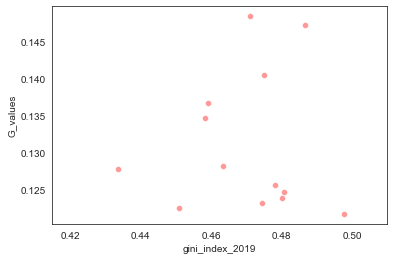

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('white')

# Plot G data vs gini_index
# sns.scatterplot(data=inequality_data, x='gini_index_2019', y='G_range', color=[0.6, 0.6, 1.0])
sns.scatterplot(data=inequality_data, x='gini_index_2019', y='G_score', color=[1.0, 0.6, 0.6])
plt.ylabel('G_values')
plt.xlim(0.415, 0.51)
plt.savefig('figures/gini_index_vs_G_values.png', dpi=250)
plt.show()

In [39]:
from yelp_functions import gini_index_sample

# create a set with all the states and a dictionary to store the values of G
states = set(reviews['state'].tolist())
G_values = dict()

reviews['price_range_squared'] = reviews['price_range'] ** 3
reviews['price_score_squared'] = reviews['price_score'] ** 3

# fill the dictionary with the G values
for state in states:
    if state in ['AB', 'CO', 'NC', 'XMS']:
        pass
    else:
        state_reviews = reviews.loc[reviews['state'] == state]
        state_reviews = state_reviews.groupby('user_id').mean()
        G_values[state] = [gini_index_sample(state_reviews['price_range_squared'].tolist()),
                           gini_index_sample(state_reviews['price_score_squared'].tolist())]

# create a dataframe for the data using G values
inequality_data = pd.DataFrame.from_dict(G_values, orient='index').reset_index()
inequality_data.rename(columns = {'index': 'state', 0: 'G_range', 1:'G_score'}, inplace = True)

# merge data from gini index with the inequality dataframe
states_data = pd.read_csv('processed_data/states_data.csv')
inequality_data = inequality_data.merge(states_data, left_on='state', right_on='postal_code')

inequality_data

,state_x,G_range,G_score,state_y,postal_code,gini_index_2019,gdppc_2021
0,NV,0.262491,0.425235,Nevada,NV,0.4710,61375
1,AZ,0.305214,0.383016,Arizona,AZ,0.4591,56511
2,IN,0.309183,0.385875,Indiana,IN,0.4584,61760
3,CA,0.350161,0.416389,California,CA,0.4866,85546
4,IL,0.292799,0.342778,Illinois,IL,0.4800,74052
5,MO,0.278549,0.363177,Missouri,MO,0.4633,58356
6,PA,0.348168,0.355168,Pennsylvania,PA,0.4745,64751
7,LA,0.289684,0.351155,Louisiana,LA,0.4978,55213
8,DE,0.269292,0.351808,Delaware,DE,0.4509,80446
9,NJ,0.307001,0.359920,New Jersey,NJ,0.4782,72524


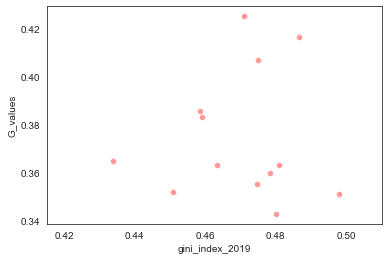

In [40]:
# Plot G data vs gini_index
# sns.scatterplot(data=inequality_data, x='gini_index_2019', y='G_range', color=[0.6, 0.6, 1.0])
sns.scatterplot(data=inequality_data, x='gini_index_2019', y='G_score', color=[1.0, 0.6, 0.6])
plt.ylabel('G_values')
plt.xlim(0.415, 0.51)
plt.savefig('figures/gini_index_vs_G_values_v2.png', dpi=250)
plt.show()